In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [73]:
!ls /Users/valentinlepinay/dev/AFP_Forecast_Alpha_Using_ML/modeling/

FFDaily.csv.gz                   Rolling.v3.csv.gz
FFDaily.universe.csv.gz          XGBOOST.500D.csv.gz
RGBM_norm.csv.zip                adj_returns.csv.gz
Rolling.120D.csv.gz              adj_returns.universe.csv.gz
Rolling.60D.csv.gz               ff3.csv.gz
Rolling.OLS.120D.csv.gz          ff3.universe.csv.gz
Rolling.OLS.250D.csv.gz          ff4.csv.gz
Rolling.OLS.500D.csv.gz          ff4.universe.csv.gz
Rolling.OLS.60D.csv.gz           totalReturnShift.universe.csv.gz
Rolling.csv.gz                   universe.csv.gz
Rolling.v2.csv.gz


In [76]:
path = '/Users/valentinlepinay/dev/AFP_Forecast_Alpha_Using_ML/modeling/'
name = 'RGBM_norm.csv'

In [77]:
df = pd.read_csv(path + name, dtype={'ticker':np.str, 'date': np.str})
# df.head(2).T

,0,1
Date,2001-01-03,2001-01-04
A,NaN,NaN
AA,NaN,NaN
AABA,NaN,NaN
AAL,NaN,NaN
AAP,NaN,NaN
AAPL,NaN,NaN
ABBV,NaN,NaN
ABC,NaN,NaN
ABMD,NaN,NaN


In [78]:
df.Date = df.Date.str.replace('-', '')

In [80]:
df.rename(columns={'Date': 'date'}, inplace=True)
df = df.loc[df.date.str[:4].isin([str(x) for x in range(2007, 2019)]), :]

In [81]:
df.head()

,date,A,AA,AABA,AAL,AAP,AAPL,ABBV,ABC,ABMD,...,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
1506,20070103,0.000489,-0.001526,0.001717,NaN,-0.001480,-0.007773,NaN,0.004254,-0.000461,...,-0.000383,0.001285,-0.002386,0.000409,-0.001930,NaN,0.000617,-0.000089,0.000224,NaN
1507,20070104,0.001416,0.000163,-0.010526,NaN,0.001739,-0.005824,NaN,0.004438,0.000122,...,0.001815,-0.009626,-0.002270,0.000638,0.002756,NaN,-0.003843,-0.000884,0.000468,NaN
1508,20070105,0.000937,0.000147,-0.000800,NaN,0.000362,0.002629,NaN,0.002399,-0.000801,...,-0.000391,-0.035451,0.000258,-0.000714,0.020725,NaN,0.000962,-0.001069,0.000012,NaN
1509,20070108,0.000002,0.000018,0.002533,NaN,0.000553,0.001339,NaN,-0.000644,-0.000059,...,-0.000603,0.003508,0.000762,0.000302,0.003691,NaN,0.001322,-0.000175,0.000799,NaN
1510,20070109,-0.000732,0.000082,0.001038,NaN,-0.000113,0.006537,NaN,0.001249,0.001199,...,0.000473,-0.002029,0.000277,0.001364,0.001564,NaN,0.000994,0.000009,-0.000013,NaN


In [90]:
df_ = pd.DataFrame()
for i, row in df.iterrows():
    df_ = df_.append(pd.DataFrame({
        'date': [row['date']] * len(row.index[1:]),
        'ticker': row.index[1:],
        'y_hat': row.values[1:]}), ignore_index=True, sort=True)

In [91]:
df_.head()

,date,ticker,y_hat
0,20070103,A,0.000489082
1,20070103,AA,-0.00152596
2,20070103,AABA,0.00171726
3,20070103,AAL,NaN
4,20070103,AAP,-0.00148006


In [92]:
df = df_.copy()
del df_

In [93]:
dff = pd.read_csv(path + 'totalReturnShift.universe.csv.gz', 
                  dtype={'ticker':np.str, 'date': np.str})

In [94]:
df = df.merge(dff, on=['date', 'ticker'], how='left')

In [95]:
del dff

In [96]:
df.head().T

,0,1,2,3,4
date,20070103,20070103,20070103,20070103,20070103
ticker,A,AA,AABA,AAL,AAP
y_hat,0.000489082,-0.00152596,0.00171726,NaN,-0.00148006
C2C,NaN,NaN,NaN,NaN,NaN


In [97]:
df.dropna(inplace=True)

In [98]:
cols = [[1, 'y_hat'],
#         [3, 'y_hatC2CindexAdjFwd3Days'],
#         [5, 'y_hatC2CindexAdjFwd5Days'],
#         [10, 'y_hatC2CindexAdjFwd10Days']
       ]

In [100]:
# df.to_csv(path + 'export_y_hat.csv', index=False)

In [99]:
name = cols[0][1]
name_return = 'C2C'
percentile = 20
holding_period = cols[0][0]

In [104]:
d = get_portfolio(df.copy(),  name, name_return, percentile, holding_period)

/Users/valentinlepinay/dev/dev/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [105]:
d.describe()

,daily_return,turnover,cumReturn
count,2911.000000,2911.000000,2911.000000
mean,0.000110,0.223984,0.138325
std,0.001034,0.074698,0.091158
min,-0.007779,0.000000,-0.003928
25%,-0.000394,0.174651,0.065095
50%,0.000105,0.225000,0.119882
75%,0.000633,0.272727,0.227862
max,0.007445,0.493056,0.324646


In [116]:
print(metrics(d, name).to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &  AvgReturn(Yearly) &  StdReturn(Yearly) &  AvgReturn(bps) &  StdReturn(bps) &  SharpRatio &  AvgTo(Period Perc.) &  StdTo(Period Perc.) \\
\midrule
y\_hat &              0.028 &              0.016 &           1.105 &          10.341 &       1.696 &               22.398 &                 7.47 \\
\bottomrule
\end{tabular}



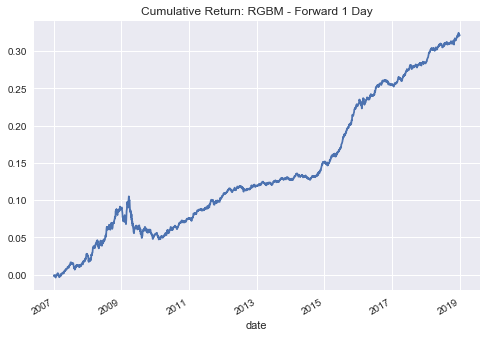

In [114]:
d[['cumReturn']].plot(title='Cumulative Return: RGBM - Forward 1 Day', legend=False)
plt.show()

In [103]:
def get_portfolio(df, name, name_return, percentile, holding_period):
    df['70'] = df.groupby('date')[name].transform(np.percentile, q=100-percentile)
    df['20'] = df.groupby('date')[name].transform(np.percentile, q=percentile)
    df['short_long'] = -1 * (df[name].values <= df['20'].values).astype(np.int) + \
        (df[name].values >= df['70'].values).astype(np.int)


    if holding_period > 1:
        df['rank_'] = df['date'].map(dict(zip(df.date.sort_values().unique(),
                                              range(1, len(df.date.unique()) + 1))))
        df.loc[(df['rank_'] != 1) & (df['rank_'] % holding_period != 0), 'short_long'] = 0
        del df['rank_']

    _range = range(0, holding_period)

    df['short_long'].fillna(0, inplace=True)
    df[name_return].fillna(0, inplace=True)

    cols_daily_returns = []

    for period in _range:
        cols_daily_returns.append('daily_return_t' + str(period + 1))
        df['daily_return_t' + str(period + 1)] = df.groupby('ticker')['short_long'].shift(
            periods=period).fillna(0).values * df[name_return].values

    df = df.loc[:, ['date', 'fpid', 'ticker', 'short_long'] + cols_daily_returns].copy()

    df['daily_stock_return'] = df[cols_daily_returns].sum(axis=1)

    df['daily_return'] = df.groupby('date').daily_stock_return.transform('mean')

    df['book' + str(holding_period)] = 0
    for period in _range:
        df['book' + str(holding_period)] += df.groupby('ticker')['short_long'].shift(
            periods=period).fillna(0)

    df['previous_book' + str(holding_period)] = df.groupby('ticker')['book' + str(holding_period)].shift(
    periods=1).fillna(0)

    df['turnover'] = (df['previous_book' + str(holding_period)].values > 0).astype(np.int) + \
        (df['short_long'].values < 0).astype(np.int)

    value = (df['previous_book' + str(holding_period)].values < 0).astype(np.int) + \
        (df['short_long'].values > 0).astype(np.int)

    df['turnover'] = (df['turnover'].values == 2).astype(np.int) + (value == 2).astype(np.int)
    del value

    df['hold'] = df.groupby('date')['short_long'].transform(np.linalg.norm, ord=1) + 0.
    df['unwind'] = df.groupby('date')['turnover'].transform('sum') + 0.

    df['turnover'] = df['unwind'].values.astype(np.float) / np.where(df['hold'].values != 0,
                                                                     df['hold'].values, np.nan)
    df = df.groupby('date').first()[['daily_return', 'turnover']].copy()
    df.index = pd.to_datetime(df.index, format='%Y%m%d')
    df['cumReturn'] = df.daily_return.cumsum()

    return df


def metrics(df, column):
    avg_return = df.daily_return.mean() * 252
    std_return = df.daily_return.std() * np.sqrt(252)
    sharp = avg_return / std_return
    std_turnover = df['turnover'].std()
    mean_turnover = df['turnover'].mean()
    return pd.DataFrame({
        'AvgReturn(Yearly)': [avg_return],
        'StdReturn(Yearly)': [std_return],
        'AvgReturn(bps)': [df.daily_return.mean() * 1e4],
        'StdReturn(bps)': [df.daily_return.std() * 1e4],
        'SharpRatio': [sharp],
        'AvgTo(Period Perc.)': [mean_turnover * 1e2],
        'StdTo(Period Perc.)': [std_turnover * 1e2]},
    index=[column]).round(3)


In [2]:
path = '/Users/valentinlepinay/dev/AFP_Forecast_Alpha_Using_ML/modeling/adj_returns.universe.csv.gz'

In [5]:
df = pd.read_csv(path, dtype={'date': np.str, 'ticker': np.str},
                usecols=['date', 'ticker', 'indexC2C'])

df = df.loc[df.date.str[:4].isin([str(x) for x in range(2007, 2019)])]
df.tail()

,date,ticker,indexC2C
2347986,20181231,JKHY,0.008
2347987,20181231,MXIM,0.008
2347988,20181231,LW,0.008
2347989,20181231,FANG,0.008
2347990,20181231,CE,0.008


In [6]:
del df['ticker']

In [7]:
df.drop_duplicates('date', inplace=True)

In [8]:
import matplotlib.pyplot as plt

In [9]:
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index, format='%Y%m%d')

In [13]:
df['S&P500'] = (df['indexC2C'] + 1).cumprod() - 1
del df['indexC2C']

In [15]:
plt.style.use('seaborn')

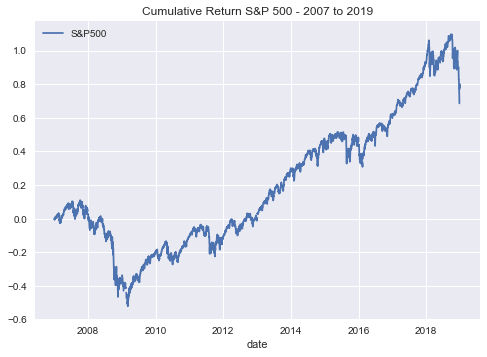

In [17]:
df.plot(title='Cumulative Return S&P 500 - 2007 to 2019')
plt.show()